# Chicago Car Crash 

- read in dataset from https://data.cityofchicago.org/Transportation/Traffic-Crashes-Crashes/85ca-t3if
- create a model to predict 'REAR END' type crashes
- utilize RandomForestClassifer model to predict target = 'REAR END'

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

from mlxtend.evaluate import feature_importance_permutation

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn

In [2]:
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')

In [3]:
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,00027e2894dd2f3fe4ff320a6d332d18e465b5c8ba2e79...,JC201794,NaN,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,...,0.0,0.0,4.0,0.0,16,4,3,41.994704,-87.699395,POINT (-87.699395085278 41.994703544264)
1,0002fb938eb0feaea33820fa55b71e4ea0b332125e1510...,JB175900,NaN,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,3.0,0.0,15,3,3,41.904671,-87.716685,POINT (-87.716685434641 41.904671135876)
2,0003fc68d857da032b1beafa8f7893ce0b123ce6b2dee5...,HZ488533,NaN,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,14,3,10,41.706808,-87.642771,POINT (-87.642771373276 41.706807861572)
3,00060f93d2ae8d4e4c7fe75ac17055dd69a081d0b928a5...,JD123586,NaN,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,...,1.0,0.0,1.0,0.0,16,3,1,41.791610,-87.703356,POINT (-87.703355598231 41.791609871969)
4,0006882952e53c291df267014a03b57684383e9ad66d9e...,JC459747,NaN,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,2.0,0.0,12,6,10,41.848490,-87.675599,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,7412aff8ad5fd9fa02750ac5993cb59a43d609c13b36d4...,JB332535,NaN,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,6.0,0.0,18,2,7,41.735715,-87.661993,POINT (-87.661992662801 41.735714804611)
398686,be972c2f9104860ba3b38c4208b74d1d92641736248e42...,JC346058,NaN,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,...,0.0,0.0,4.0,0.0,16,6,7,41.907814,-87.775408,POINT (-87.775408056534 41.907814460403)
398687,82aa5cd836d77c28cd50d157af9dd697307c975c8d3686...,JA237504,NaN,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,16,2,4,41.791349,-87.723255,POINT (-87.723255322969 41.791349423725)
398688,855017044ca271cd0cfa23806a99ee664857857b8a5385...,JC240615,NaN,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,19,6,4,41.877844,-87.646782,POINT (-87.646781834111 41.877843584048)


In [4]:
# Checking out the dataframe columns
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [5]:
# filling all na with UNKNOWN string, so we can encode later
df.fillna('UNKOWN', inplace=True)

In [6]:
# dropping the unecessary columns that does not make sense
df.drop(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'RD_NO', 'REPORT_TYPE', 'STREET_NO', 'BEAT_OF_OCCURRENCE', 
         'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'WORKERS_PRESENT_I', 'INJURIES_UNKNOWN', 'LONGITUDE', 'LATITUDE',
         'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL','INJURIES_INCAPACITATING', 
         'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'DAMAGE',
         'DATE_POLICE_NOTIFIED', 'CRASH_TYPE','NUM_UNITS','STREET_DIRECTION','STREET_NAME', 'LANE_CNT'], axis=1, inplace=True)

In [7]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


In [8]:
# We have speed limits that are not logged correctly, so we will drop them.
# There wasn't a lot so this will not effect our data
list_ = [3, 9, 99, 39, 1, 2, 32, 33, 6, 24, 11, 34, 18, 12, 36, 7, 14, 16, 38, 31, 22, 23, 63, 4, 26]
for n in list_:
    df.drop(index=df[df['POSTED_SPEED_LIMIT'] == n].index, inplace=True)

In [9]:
df

,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LOCATION
0,03/27/2019 04:20:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,ANGLE,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FAILING TO YIELD RIGHT-OF-WAY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,4,3,POINT (-87.699395085278 41.994703544264)
1,03/06/2018 03:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,15,3,3,POINT (-87.716685434641 41.904671135876)
2,10/25/2016 02:10:00 PM,30,TRAFFIC SIGNAL,UNKNOWN,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,14,3,10,POINT (-87.642771373276 41.706807861572)
3,01/21/2020 04:16:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PEDESTRIAN,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,16,3,1,POINT (-87.703355598231 41.791609871969)
4,10/04/2019 12:00:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,IMPROPER TURNING/NO SIGNAL,UNKOWN,UNKOWN,UNKOWN,12,6,10,POINT (-87.67559940405 41.848490427751)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398685,07/02/2018 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,UNABLE TO DETERMINE,UNABLE TO DETERMINE,UNKOWN,UNKOWN,UNKOWN,18,2,7,POINT (-87.661992662801 41.735714804611)
398686,07/12/2019 04:50:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,FAILING TO REDUCE SPEED TO AVOID CRASH,UNKOWN,UNKOWN,UNKOWN,16,6,7,POINT (-87.775408056534 41.907814460403)
398687,04/24/2017 04:30:00 PM,15,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,DRY,...,Y,UNABLE TO DETERMINE,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,16,2,4,POINT (-87.723255322969 41.791349423725)
398688,04/26/2019 07:10:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,...,UNKOWN,FOLLOWING TOO CLOSELY,NOT APPLICABLE,UNKOWN,UNKOWN,UNKOWN,19,6,4,POINT (-87.646781834111 41.877843584048)


## OneHotEncoding: FIRST_CRASH_TYPE

In [10]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [11]:
# Creating a new dataframe for FIRST_CRASH_TYPE
# Then we will OneHotEncode the data to categories
crash_type = df['FIRST_CRASH_TYPE']
crash_df = pd.DataFrame(crash_type, columns=['FIRST_CRASH_TYPE'])
crash_df = pd.DataFrame(ohe.fit_transform(crash_df[['FIRST_CRASH_TYPE']]).toarray())
crash_df.columns = ohe.get_feature_names(['FIRST_CRASH_TYPE'])

In [12]:
# # Each column will be a FIRST_CRASH_TYPE, so we will need to label each column
# crash_col = df['FIRST_CRASH_TYPE'].unique()
# crash_df.columns = crash_col

In [12]:
crash_df.columns

Index(['FIRST_CRASH_TYPE_ANGLE', 'FIRST_CRASH_TYPE_ANIMAL',
       'FIRST_CRASH_TYPE_FIXED OBJECT', 'FIRST_CRASH_TYPE_HEAD ON',
       'FIRST_CRASH_TYPE_OTHER NONCOLLISION', 'FIRST_CRASH_TYPE_OTHER OBJECT',
       'FIRST_CRASH_TYPE_OVERTURNED', 'FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE',
       'FIRST_CRASH_TYPE_PEDALCYCLIST', 'FIRST_CRASH_TYPE_PEDESTRIAN',
       'FIRST_CRASH_TYPE_REAR END', 'FIRST_CRASH_TYPE_REAR TO FRONT',
       'FIRST_CRASH_TYPE_REAR TO REAR', 'FIRST_CRASH_TYPE_REAR TO SIDE',
       'FIRST_CRASH_TYPE_SIDESWIPE OPPOSITE DIRECTION',
       'FIRST_CRASH_TYPE_SIDESWIPE SAME DIRECTION', 'FIRST_CRASH_TYPE_TRAIN',
       'FIRST_CRASH_TYPE_TURNING'],
      dtype='object')

In [16]:
# 97,954 "REAR END" type crashes from 300,332 total types of crashes
# very unbalanced 
crash_df['FIRST_CRASH_TYPE_REAR END'].value_counts()

0.0    300332
1.0     97954
Name: FIRST_CRASH_TYPE_REAR END, dtype: int64

In [21]:
print(f'REAR ENDS are : {(97954*100)/300332}% of total crashes')

REAR ENDS are : 32.61523913535687% of total crashes


## LabelEncoding: FEATURES

In [22]:
# Here we select the features we want to use and LabelEncode them using a for loop
# We will also create a new dataframe for them
text_col = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'TRAFFICWAY_TYPE', 
            'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I',
            'HIT_AND_RUN_I', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE','DOORING_I', 'WORK_ZONE_I', 
            'WORK_ZONE_TYPE']

en_df = pd.DataFrame()
for col in text_col:
    encoder = LabelEncoder()
    en_df[col] = encoder.fit_transform(df[col])
    
en_df

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,4,3,2,3,8,3,0,1,1,1,1,18,26,1,1,3
1,4,3,2,3,8,3,0,1,1,1,1,36,36,1,1,3
2,16,6,2,3,8,3,0,1,1,1,2,36,36,1,1,3
3,4,3,2,3,6,3,0,1,2,1,1,36,36,1,1,3
4,16,1,2,3,8,3,0,1,2,1,1,19,24,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398281,4,3,2,3,8,3,0,2,1,1,1,36,36,1,1,3
398282,16,1,2,3,8,3,0,1,1,1,1,19,17,1,1,3
398283,4,3,2,3,12,3,0,5,1,1,2,36,26,1,1,3
398284,4,3,2,3,2,3,0,1,1,1,1,19,26,1,1,3


In [23]:
# Merge the FIRST_CRASH_TYPE and the LabelEncoded dataframe together
df2 = pd.merge(crash_df, en_df, left_index=True, right_index=True)

In [116]:
# Here we have the Features and all Crash types 
df2.head()

,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,...,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,18,26,1,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,36,36,1,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,2,36,36,1,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,2,1,1,36,36,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,1,19,24,1,1,3


## TARGET: Rear End

In [25]:
# Defining our Features and Target
# For X, we want to remove all of the other CRASH types and keep the features.
y = df2['FIRST_CRASH_TYPE_REAR END']
X = df2.drop(columns=crash_df.columns.tolist(), axis=1)

In [35]:
y.value_counts()

0.0    300332
1.0     97954
Name: FIRST_CRASH_TYPE_REAR END, dtype: int64

In [115]:
df2.head()

,FIRST_CRASH_TYPE_ANGLE,FIRST_CRASH_TYPE_ANIMAL,FIRST_CRASH_TYPE_FIXED OBJECT,FIRST_CRASH_TYPE_HEAD ON,FIRST_CRASH_TYPE_OTHER NONCOLLISION,FIRST_CRASH_TYPE_OTHER OBJECT,FIRST_CRASH_TYPE_OVERTURNED,FIRST_CRASH_TYPE_PARKED MOTOR VEHICLE,FIRST_CRASH_TYPE_PEDALCYCLIST,FIRST_CRASH_TYPE_PEDESTRIAN,...,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,18,26,1,1,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,1,36,36,1,1,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,1,1,2,36,36,1,1,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,1,2,1,1,36,36,1,1,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,2,1,1,19,24,1,1,3


## Vanilla RandomForestClassifier: Rear End (minor parameter changes)

In [39]:
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [40]:
y_test_pred = rf.predict(X_test)

In [41]:
print(f'Accuracy Score Test: {accuracy_score(y_test, y_test_pred)}')
print(f'ROC_AUC Test: {roc_auc_score(y_test, y_test_pred)}')
# ROC_AUC: It tells how much a model is capable of distinguishing between classes.

Accuracy Score Test: 0.8035491905354919
ROC_AUC Test: 0.7785079724588094


### Feature Importance: RandomForestClassifier

In [74]:
importances = rf.feature_importances_

#argsort will return sorted indices by sorting array (highest to lowest)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 11 (0.481346)
2. feature 12 (0.105203)
3. feature 4 (0.090527)
4. feature 0 (0.063858)
5. feature 3 (0.047713)
6. feature 1 (0.038037)
7. feature 8 (0.031990)
8. feature 2 (0.031794)
9. feature 10 (0.030345)
10. feature 6 (0.027005)
11. feature 7 (0.023310)
12. feature 5 (0.011697)
13. feature 9 (0.011450)
14. feature 13 (0.002234)
15. feature 14 (0.001884)
16. feature 15 (0.001606)


In [88]:
X.columns[11:13]
#PRIM_CONTRIBUTORY_CAUSE is the most importance feature, provides helpful data.

Index(['PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE'], dtype='object')

In [96]:
print(df['PRIM_CONTRIBUTORY_CAUSE'])
print(df['SEC_CONTRIBUTORY_CAUSE'])

0         FAILING TO YIELD RIGHT-OF-WAY
1                   UNABLE TO DETERMINE
2                   UNABLE TO DETERMINE
3                   UNABLE TO DETERMINE
4                 FOLLOWING TOO CLOSELY
                      ...              
398685              UNABLE TO DETERMINE
398686            FOLLOWING TOO CLOSELY
398687              UNABLE TO DETERMINE
398688            FOLLOWING TOO CLOSELY
398689                   NOT APPLICABLE
Name: PRIM_CONTRIBUTORY_CAUSE, Length: 398286, dtype: object
0                                 NOT APPLICABLE
1                            UNABLE TO DETERMINE
2                            UNABLE TO DETERMINE
3                            UNABLE TO DETERMINE
4                     IMPROPER TURNING/NO SIGNAL
                           ...                  
398685                       UNABLE TO DETERMINE
398686    FAILING TO REDUCE SPEED TO AVOID CRASH
398687                            NOT APPLICABLE
398688                            NOT APPLICABLE
398689   

## RandomForestClassifier: Hyperparameters (GridSearchCV)

In [101]:
# Here we set a some parameters that the GridSearch will run through.
grid_p = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=4, scoring='roc_auc')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [102]:
print(f'Best ROC_AUC score: {grid_search.best_score_}\nPrevious score: 0.78')

Best ROC_AUC score: 0.837659023663607
Previous score: 0.78


In [103]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_samples': 400,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 100}

In [104]:
grid_p = {"n_estimators": [50, 100],
          "criterion": ["gini", "entropy"],
          "max_depth": [4, 6, 10],
          "min_samples_split": [5, 10],
          "min_samples_leaf": [5, 10],
         "max_samples": [400]}

grid_search = GridSearchCV(rf, grid_p, n_jobs=-1, cv=4, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [105]:
print(f'Best Accuracy score: {grid_search.best_score_}\nPrevious score: 0.80')

Best Accuracy score: 0.8276277533592726
Previous score: 0.80


## Data Visual: Rear End Crashes

In [108]:
# Selecting the columns with only "REAR END" crashes
rear_end = df[df['FIRST_CRASH_TYPE'] == 'REAR END']

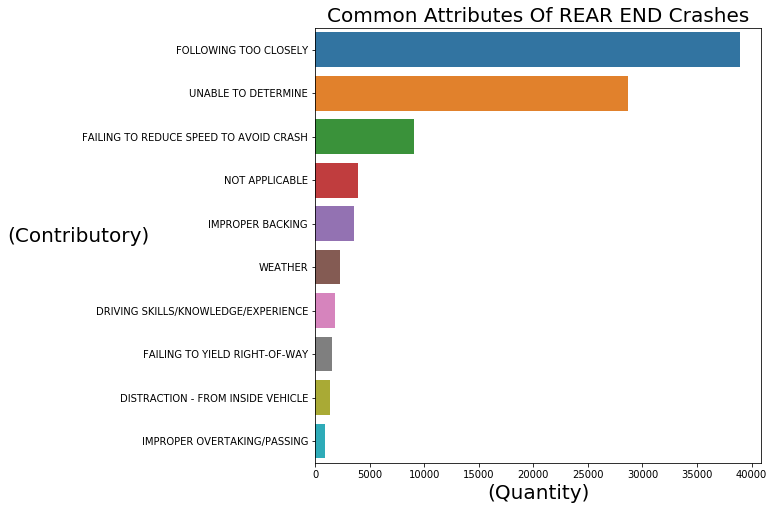

In [121]:
# Bar graph of the top 10 PRIMARY_CONTRIBUTORY

plt.figure(figsize=(8,8))

y= rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().values[:10]
x=rear_end.PRIM_CONTRIBUTORY_CAUSE.value_counts().index[:10]

sn.barplot(y, x)
plt.title('Common Attributes Of REAR END Crashes', size=20)
plt.ylabel("(Contributory)", size=20, rotation=0)
plt.xlabel("(Quantity)", size=20)
plt.xticks(size=10)
plt.yticks(size=10);